# Introduction to Keras
In this notebook we'll train a simple neural network to recognize the handwritten numbers 0-9 from pictures in the MNIST dataset.
Note that the pictures are in black & white and all have a size of 28x28=784 pixels 

## Preparation
We import the required libraries. We're going to use a "dense" neural network, built out in sequential fashion.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8,8) # magnification to make the pictures a bit more readable

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils
from keras.callbacks import EarlyStopping, ModelCheckpoint

/Users/gmarchetti/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Load the dataset

In [2]:
nb_classes = 10 #0-9

# the dataset is common and already prepared
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)

X_train original shape (60000, 28, 28)
y_train original shape (60000,)


Let's have a look, just in case...

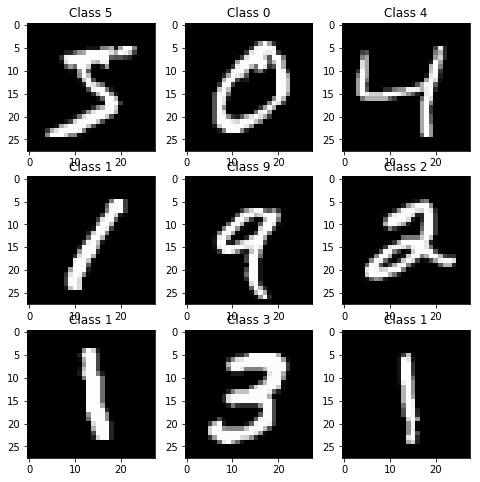

In [3]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))
plt.show()

## Reshape the data
The neural network accepts a vector of inputs. We'll need to reshape the data from 28x28 matrices to 784-element vectors. Also, we'll scale them to be in [0-1] rather than [0-255]

In [4]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print("Training vector shape", X_train.shape)
print("Testing vector shape", X_test.shape)

Training vector shape (60000, 784)
Testing vector shape (10000, 784)


One-hot encode the training and test labels: only 1 class is correct so
0->[1,0,0,0,0,0,0,0,0,0], 
1->[0,1,0,0,0,0,0,0,0,0], etc...

In [5]:
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

## Build the network
3 layers, fully connected
784 inputs -> 512 hidden nodes -> 512 hidden nodes -> 10 outputs (1 out of 10 classes)

In [6]:
model = Sequential()
model.add(Dense(512, input_shape=(784,))) # First hiddel layer size 512 and input 784
model.add(Activation('relu'))             # ReLU activation                           
model.add(Dropout(0.2))                   # Dropout regularization
model.add(Dense(512))                     # Second hidden layer 
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))                      # Output layer
model.add(Activation('softmax'))          # Softmax activation for multi-class problems

## Compile the model 
We specify a loss function, an optimizer and the metrics for evaluation.
For multi-class problems we use categorical cross-entropy.
The optimizer is stochastic gradient descent. If time allows, try 'adam' or 'adagrad', add momentum and decay.

In [7]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


## Train the model
If time allows, try out different batch sizes and number of epochs

In [8]:
model.fit(X_train, Y_train,
          batch_size=128, epochs=20, verbose=1,
          validation_data=(X_test, Y_test),
          callbacks=[EarlyStopping(verbose=1, patience=5, monitor='val_loss')])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s - loss: 1.2201 - acc: 0.6908 - val_loss: 0.5365 - val_acc: 0.8733
Epoch 2/20
60000/60000 [==============================] - 3s - loss: 0.5294 - acc: 0.8517 - val_loss: 0.3764 - val_acc: 0.8975
Epoch 3/20
60000/60000 [==============================] - 3s - loss: 0.4243 - acc: 0.8772 - val_loss: 0.3233 - val_acc: 0.9090
Epoch 4/20
60000/60000 [==============================] - 3s - loss: 0.3739 - acc: 0.8922 - val_loss: 0.2918 - val_acc: 0.9175
Epoch 5/20
60000/60000 [==============================] - 3s - loss: 0.3434 - acc: 0.9001 - val_loss: 0.2714 - val_acc: 0.9233
Epoch 6/20
60000/60000 [==============================] - 3s - loss: 0.3195 - acc: 0.9078 - val_loss: 0.2542 - val_acc: 0.9271
Epoch 7/20
60000/60000 [==============================] - 3s - loss: 0.2997 - acc: 0.9124 - val_loss: 0.2395 - val_acc: 0.9307
Epoch 8/20
60000/60000 [==============================] - 3s 

## Evaluate
Display the accuracy, i.e. the metric we compiled for.

In [9]:
score = model.evaluate(X_test, Y_test,
                       verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.14399669604301452
Test accuracy: 0.9576


## Let's have a look

In [10]:
# The predict_classes function outputs the highest probability class as scored by the model
predicted_classes = model.predict_classes(X_test)

# Check which items we got right / wrong
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

 8544/10000 [========================>.....] - ETA: 0s

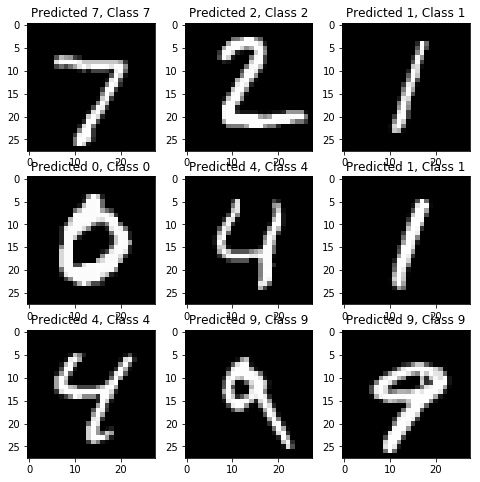

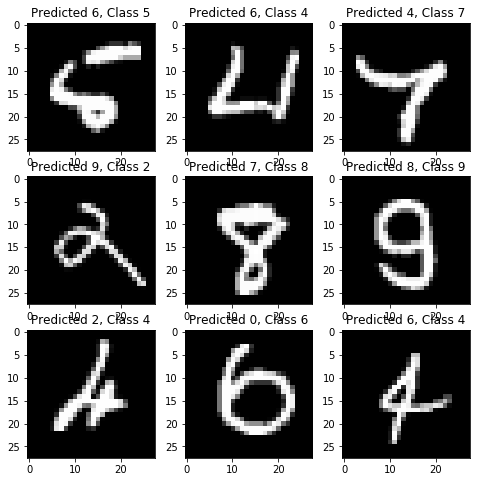

In [11]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
    
plt.show()